<a href="https://colab.research.google.com/github/biffsocko/SUNY_Poly_NCS590/blob/main/TRMurphy_lab5_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>
Tom Murphy</h1>
NCS590 /  Machine Learning<br>
3/7/2023

**Import all the modules and data**<br>
note: importing both Decision Tree and Nearest Neighbor clasifiers in thie section as well

In [41]:
##########################################
# Import all the things
##########################################
import matplotlib.pyplot as plt
from sklearn import metrics

import pandas as pd
from sklearn.model_selection import train_test_split

#import the logistic regression classifier
from sklearn.linear_model import LogisticRegression

#import the Decision Tree classifier
from sklearn import tree

#import the NearestNeighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# import the NearestNeighbors classifier
from sklearn.ensemble import RandomForestClassifier

#import some classification evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# print test messages when set greater than 0
DEBUG=0   


##########################################
# Import the data
##########################################
df = pd.read_csv('/content/payment_fraud.csv')
df = pd.get_dummies(df, columns=['paymentMethod'])

if(DEBUG > 0 ):
    # see what the data look like
    df.sample(10)


**plots the graphs**

In [42]:
def plotit(name):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)

    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name= name)
    display.plot()
    plt.show()

**does the training**

In [43]:
def trainit():
    X_train, X_test, y_train, y_test = train_test_split(
    df.drop('label', axis=1), df['label'], test_size=0.33, random_state=42)

<h1>Decision Tree</h1>

In [44]:
trainit()

print("==================================")
print("Decision Tree")
print("==================================")

clf = tree.DecisionTreeClassifier() 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print("Accuracy:", accuracy_score(y_pred, y_test)*100)
print("Recall:", recall_score(y_pred, y_test)*100)
print("Precision:", precision_score(y_pred, y_test)*100)
print("F1 Score:", f1_score(y_pred, y_test)*100)

Decision Tree
[[12753     0]
 [    0   190]]


Accuracy: 100.0
Recall: 100.0
Precision: 100.0
F1 Score: 100.0


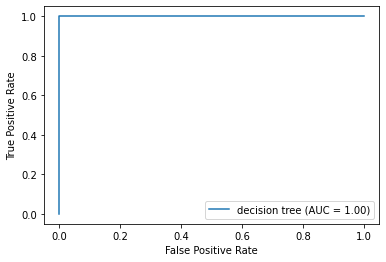

In [45]:
plotit("decision tree")

<h1>Nearest Neighbor</h1>


In [46]:
trainit()

print("==================================")
print("Nearest Neighbor")
print("==================================")



neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print("Accuracy:", accuracy_score(y_pred, y_test)*100)
print("Recall:", recall_score(y_pred, y_test)*100)
print("Precision:", precision_score(y_pred, y_test)*100)
print("F1 Score:", f1_score(y_pred, y_test)*100)

Nearest Neighbor
[[12753     0]
 [    0   190]]


Accuracy: 100.0
Recall: 100.0
Precision: 100.0
F1 Score: 100.0


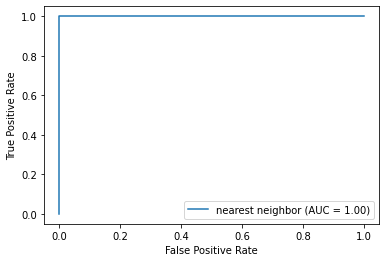

In [47]:
plotit("nearest neighbor")

<h1>Random Forest</H1>

In [50]:
trainit()

print("==================================")
print("Random Forest")
print("==================================")

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print("Accuracy:", accuracy_score(y_pred, y_test)*100)
print("Recall:", recall_score(y_pred, y_test)*100)
print("Precision:", precision_score(y_pred, y_test)*100)
print("F1 Score:", f1_score(y_pred, y_test)*100)

Random Forest
[[12753     0]
 [    0   190]]


Accuracy: 100.0
Recall: 100.0
Precision: 100.0
F1 Score: 100.0


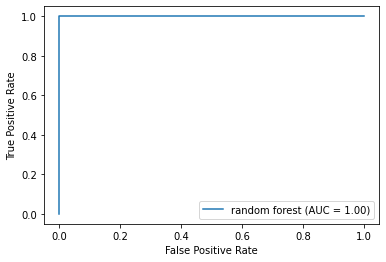

In [49]:
plotit("random forest")